In [1]:
import numpy as np
import matplotlib.pyplot as plt

from CrossSections import Transfer_sigma
from cross_sections import sigmaV

from scipy.integrate import quad, odeint
from scipy import misc, special, optimize

import matplotlib.patches as mpatches
from PlotSettings import MainColor1, MainColor2, MainColor3, BackgroundColor3, BackgroundColor1, BackgroundColor2, Gray1, Gray2
from Constants import DensityFactor, Mp, mm


## Small Scales (SIDM)

C:\Users\Nicolás\AppData\Local\Temp\ipykernel_32684\1014452383.py:72: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


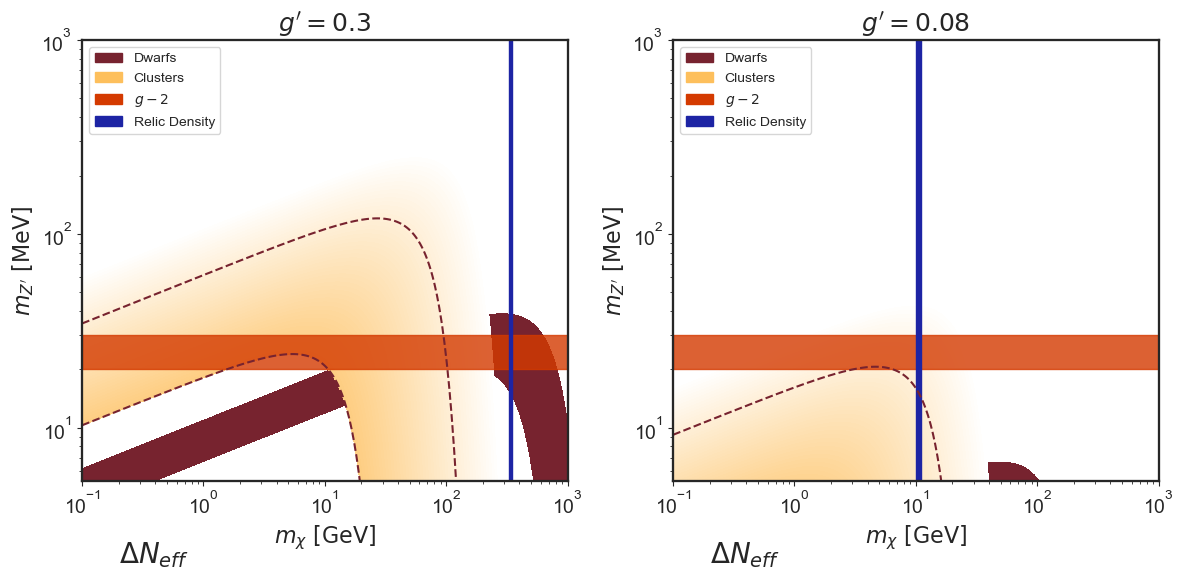

In [2]:
gp_l = (0.3, 8e-2)  

g_p = 200 #Grid Points
M_l = np.logspace(np.log10(5.3), 3, g_p)
m_l = np.logspace(-1, 3, g_p)

#Grids
M_g, m_g = np.meshgrid(M_l, m_l)
sigma_grid_dwarf = np.zeros((g_p, g_p))
sigma_grid_clusters = np.zeros((g_p, g_p))

n = 50
levels_dw=[10, 70]
levels_cl= np.logspace(-3, 0.1, n+1)  # Generate logarithmically spaced values
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax = ax.ravel()

#Colors
clusterColors = BackgroundColor3
DwColors =BackgroundColor1
Muoncolors = MainColor3
RelicColors = MainColor2


fig_index = 0

patch_dw = mpatches.Patch(color=DwColors, label=r'Dwarfs')
patch_cl = mpatches.Patch(color=clusterColors, label=r'Clusters')
patch_g2 = mpatches.Patch(color=Muoncolors, label=r'$g-2$')
patch_Oh2 = mpatches.Patch(color=RelicColors, label=r'Relic Density')

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(c1)
    c2=np.array(c2)
    return (1-mix)*c1 + mix*c2

c2 = clusterColors  # yellow
c1 = (1, 1, 1)  # white
clf = [colorFader(c1, c2, (np.log10(l) + 3)/4) for l in levels_cl]

for g in gp_l:
    
    for i in range(g_p):
        for j in range(g_p):
            sigma_grid_dwarf[i, j] = Transfer_sigma(30, g, M_l[j], m_l[i])
            sigma_grid_clusters[i, j] = Transfer_sigma(1000, g, M_l[j], m_l[i])

    ax[fig_index].set_title('$g^{{\prime}} = {}$'.format(g))
    
    ax[fig_index].contourf(m_g, M_g, sigma_grid_dwarf, levels_dw, colors=(DwColors,))
    ax[fig_index].contourf(m_g, M_g, sigma_grid_clusters, levels_cl, colors=clf)
    ax[fig_index].contour(m_g, M_g, sigma_grid_clusters, [0.01, levels_cl[-1] ], colors=(DwColors,), linestyles='dashed')
    
    ax[fig_index].fill_between(m_l, y1=20, y2=30, color=Muoncolors, alpha=0.8)
    ax[fig_index].text(0.2, 2, r'$\Delta N_{eff}$', fontsize=20)    
    #ax[fig_index].fill_between(m_l, M_l[0], 5.3, color=Gray1, alpha=0.6) 
    ax[fig_index].set_xlabel('$m_{\chi} ~[\mathrm{GeV} ]$' )
    ax[fig_index].set_ylabel('$m_{Z\'} ~[\mathrm{MeV} ]$' )
    ax[fig_index].set_xscale('log')
    ax[fig_index].set_yscale('log')
    ax[fig_index].legend(handles=[patch_dw, patch_cl, patch_g2, patch_Oh2], loc='upper left')

    fig_index +=1


#Relic Density
ax[0].fill_between(([330, 350]), y1=M_l[0], y2=M_l[-1], color=RelicColors)
ax[1].fill_between(([10, 11]), y1=M_l[0], y2=M_l[-1], color=RelicColors)


fig.tight_layout()
fig.show()
fig.savefig("Plots/ParameterSpacePlot.pdf")
fig.savefig("Plots/ParameterSpacePlot.svg")

The mixing constraints from Direct Detections experiments is shown below

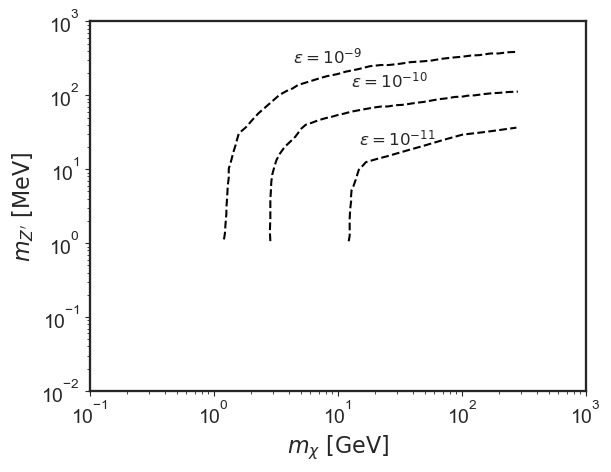

<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt


MixingConstraints1 = np.loadtxt("Data-Sets/Mixing-Constraints(1).csv", delimiter=",")
MixingConstraints2 = np.loadtxt("Data-Sets/Mixing-Constraints(2).csv", delimiter=",")
MixingConstraints3 = np.loadtxt("Data-Sets/Mixing-Constraints(3).csv", delimiter=",")

MixingConstraints1_mcoordinate = MixingConstraints1[:,0]
MixingConstraints1_Mcoordinate = MixingConstraints1[:,1]

MixingConstraints2_mcoordinate = MixingConstraints2[:,0]
MixingConstraints2_Mcoordinate = MixingConstraints2[:,1]

MixingConstraints3_mcoordinate = MixingConstraints3[:,0]
MixingConstraints3_Mcoordinate = MixingConstraints3[:,1]


plt.plot(MixingConstraints1_mcoordinate, MixingConstraints1_Mcoordinate, '--', color='k')
plt.plot(MixingConstraints2_mcoordinate, MixingConstraints2_Mcoordinate, '--', color='k')
plt.plot(MixingConstraints3_mcoordinate, MixingConstraints3_Mcoordinate, '--', color='k')

# Adding text labels to the curves
plt.text(MixingConstraints1_mcoordinate[len(MixingConstraints1_mcoordinate)//2] , 
         MixingConstraints1_Mcoordinate[len(MixingConstraints1_Mcoordinate)//2]*2, 
         r'$\epsilon = 10^{-9}$', fontsize=12, verticalalignment='bottom')

plt.text(MixingConstraints2_mcoordinate[len(MixingConstraints2_mcoordinate)//2], 
         MixingConstraints2_Mcoordinate[len(MixingConstraints2_Mcoordinate)//2]*2, 
         r'$\epsilon = 10^{-10}$', fontsize=12, verticalalignment='bottom')

plt.text(MixingConstraints3_mcoordinate[len(MixingConstraints3_mcoordinate)//2], 
         MixingConstraints3_Mcoordinate[len(MixingConstraints3_Mcoordinate)//2]*2, 
         r'$\epsilon = 10^{-11}$', fontsize=12, verticalalignment='bottom')




plt.xlabel(r'$m_{\chi} ~[\mathrm{GeV} ]$')
plt.ylabel('$m_{Z\'} ~[\mathrm{MeV} ]$' ) 
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1, 1e3)
plt.ylim(0.01, 1e3)
plt.show()
plt.savefig('MixingConstraints.pdf')

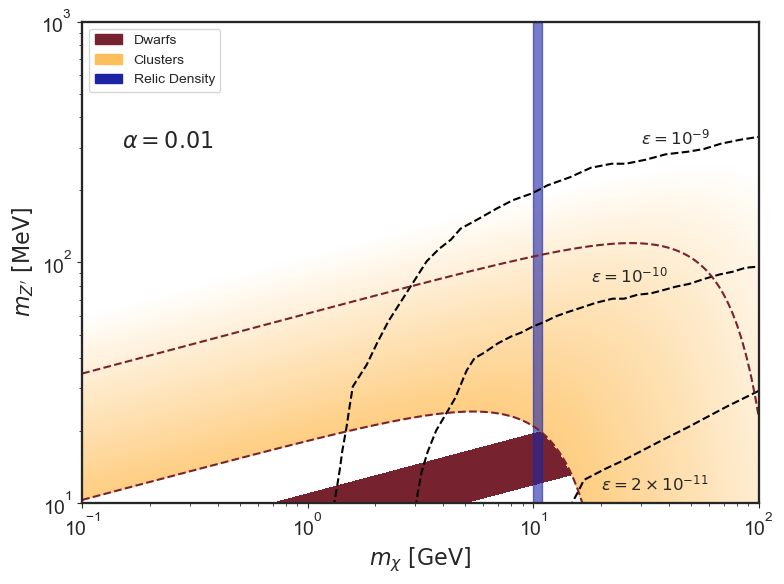

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define parameters
gp_l = (0.3, 8e-2)
g_p = 200  # Grid Points
M_l = np.logspace(np.log10(5.3), 3, g_p)
m_l = np.logspace(-1, 3, g_p)

# Grids
M_g, m_g = np.meshgrid(M_l, m_l)
sigma_grid_dwarf = np.zeros((g_p, g_p))
sigma_grid_clusters = np.zeros((g_p, g_p))

n = 50
levels_dw = [10, 70]
levels_cl = np.logspace(-3, 0.1, n+1)

# Colors
clusterColors = BackgroundColor3
DwColors = BackgroundColor1
Muoncolors = MainColor3
RelicColors = MainColor2

patch_dw = mpatches.Patch(color=DwColors, label=r'Dwarfs')
patch_cl = mpatches.Patch(color=clusterColors, label=r'Clusters')
#patch_g2 = mpatches.Patch(color=Muoncolors, label=r'$g-2$')
patch_Oh2 = mpatches.Patch(color=RelicColors, label=r'Relic Density')

# Function to fade colors
def colorFader(c1, c2, mix=0):
    c1 = np.array(c1)
    c2 = np.array(c2)
    return (1-mix)*c1 + mix*c2

c2 = clusterColors
c1 = (1, 1, 1)  
clf = [colorFader(c1, c2, (np.log10(l) + 3)/4) for l in levels_cl]

# Extract and plot the left subplot
fig_left, ax_left = plt.subplots(figsize=(8, 6))

g = gp_l[0]  # Extract first value (left plot)

for i in range(g_p):
    for j in range(g_p):
        sigma_grid_dwarf[i, j] = Transfer_sigma(30, g, M_l[j], m_l[i])
        sigma_grid_clusters[i, j] = Transfer_sigma(1000, g, M_l[j], m_l[i])



plt.plot(MixingConstraints1_mcoordinate, MixingConstraints1_Mcoordinate, '--', color='k')
plt.plot(MixingConstraints2_mcoordinate, MixingConstraints2_Mcoordinate, '--', color='k')
plt.plot(MixingConstraints3_mcoordinate, MixingConstraints3_Mcoordinate, '--', color='k')

# Adding text labels to the curves
plt.text(30, 300, r'$\epsilon = 10^{-9}$', fontsize=12, verticalalignment='bottom')

plt.text(18, 80, r'$\epsilon = 10^{-10}$', fontsize=12, verticalalignment='bottom')

plt.text(20, 11, r'$\epsilon =2 \times 10^{-11}$', fontsize=12, verticalalignment='bottom')

plt.text(0.15, 300, r'$\alpha = 0.01$', fontsize=16)

ax_left.contourf(m_g, M_g, sigma_grid_dwarf, levels_dw, colors=(DwColors,))
ax_left.contourf(m_g, M_g, sigma_grid_clusters, levels_cl, colors=clf)
ax_left.contour(m_g, M_g, sigma_grid_clusters, [0.01, levels_cl[-1]], colors=(DwColors,), linestyles='dashed')

#ax_left.fill_between(m_l, y1=20, y2=30, color=Muoncolors, alpha=0.8)


ax_left.set_xlabel('$m_{\chi} ~[\mathrm{GeV} ]$')
ax_left.set_ylabel('$m_{Z\'} ~[\mathrm{MeV} ]$')
ax_left.set_xscale('log')
ax_left.set_yscale('log')
ax_left.set_xlim(0.1, 1e2)
ax_left.set_ylim(10, 1e3)

ax_left.legend(handles=[patch_dw, patch_cl, patch_Oh2], loc='upper left')



#Relic Density
#ax_left.fill_between(([330, 350]), y1=M_l[0], y2=M_l[-1], color=RelicColors)
ax_left.fill_between(([10, 11]), y1=M_l[0], y2=M_l[-1], color=RelicColors, alpha=0.6)

# Save the separate plot
fig_left.tight_layout()
fig_left.savefig("Plots/ParameterSpacePlot_Left.pdf")
fig_left.savefig("Plots/ParameterSpacePlot_Left.svg")
plt.show()


## Plot for the parameter space of the DM 

<Figure size 800x600 with 0 Axes>

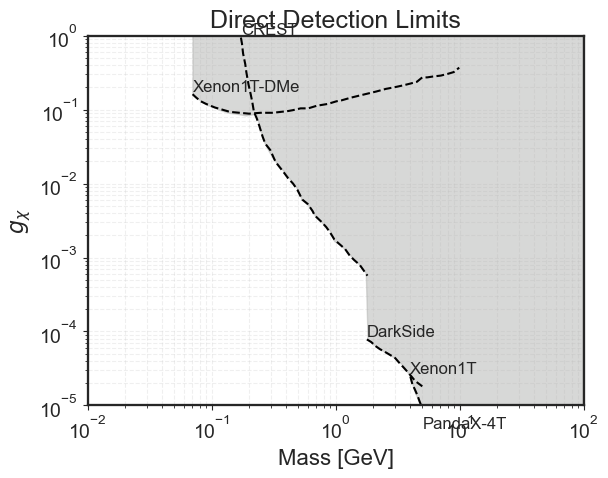

In [5]:
plt.figure(figsize=(8, 6))  # width = 10 inches, height = 6 inches


#Colors
clusterColors = BackgroundColor3
DwColors =BackgroundColor1
Muoncolors = MainColor3
RelicColors = MainColor2


patch_dw = mpatches.Patch(color=DwColors, label=r'Dwarfs')
patch_cl = mpatches.Patch(color=clusterColors, label=r'Clusters')
patch_g2 = mpatches.Patch(color=Muoncolors, label=r'$g-2$')
patch_Oh2 = mpatches.Patch(color=RelicColors, label=r'Relic Density')

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(c1)
    c2=np.array(c2)
    return (1-mix)*c1 + mix*c2


################## | Direct Detection Data  | #################

# Optional: Create figure and set limits (you can adjust these)
plt.figure()
plt.yscale("log")
plt.xscale("log")

# Placeholder for ymax across all plots
y_max_global = 1  # You can also use plt.ylim() if the limits are dynamic


# Bottom Comstraints for Direct Detection Data
DarkShadow = np.loadtxt("Data-Sets/DirectDetection/DirectDetectionShadow.csv", delimiter=',')
DarkShadow_x = DarkShadow[:,0]
DarkShadow_y = DarkShadow[:,1]
plt.fill_between(DarkShadow_x, DarkShadow_y, y_max_global, color=Gray2, alpha=0.5)



#Xenon1T-DMe
Xenon1TDMe = np.loadtxt("Data-Sets/DirectDetection/Xenon1T-DMe.csv", delimiter=",")
Xenon1_x = Xenon1TDMe[:, 0]
Xenon1_y = Xenon1TDMe[:, 1]
plt.plot(Xenon1_x, Xenon1_y, '--', color='k')
plt.text(Xenon1_x[0], Xenon1_y[0]*1.1, "Xenon1T-DMe")


# CREST
CREST = np.loadtxt("Data-Sets/DirectDetection/CREST.csv", delimiter=",")
CREST_x = CREST[:, 0]
CREST_y = CREST[:, 1]
plt.plot(CREST_x, CREST_y, '--', color='k')
plt.text(CREST_x[0], CREST_y[0]*1.1, "CREST")

# DarkSide
DarkSide = np.loadtxt("Data-Sets/DirectDetection/DarkSide.csv", delimiter=",")
DarkSide_x = DarkSide[:, 0]
DarkSide_y = DarkSide[:, 1]
plt.plot(DarkSide_x, DarkSide_y, '--', color='k')
plt.text(DarkSide_x[0], DarkSide_y[0]*1.1, "DarkSide")

# PandaX-4T
PandaX_4T = np.loadtxt("Data-Sets/DirectDetection/PandaX-4T.csv", delimiter=",")
PandaX_4T_x = PandaX_4T[:, 0]
PandaX_4T_y = PandaX_4T[:, 1]
plt.plot(PandaX_4T_x, PandaX_4T_y, '--', color='k')
plt.text(PandaX_4T_x[0], PandaX_4T_y[0]*1.1, "PandaX-4T")

# Xenon1T
Xenon1T = np.loadtxt("Data-Sets/DirectDetection/Xenon1T.csv", delimiter=",")
Xenon1T_x = Xenon1T[:, 0]
Xenon1T_y = Xenon1T[:, 1]
plt.plot(Xenon1T_x, Xenon1T_y, '--', color='k')
plt.text(Xenon1T_x[0], Xenon1T_y[0]*1.1, "Xenon1T")

# Set plot limits last to ensure all fills are visible
plt.ylim(1e-5, y_max_global)
plt.xlim(1e-2, 1e2)

plt.xlabel("Mass [GeV]")
plt.ylabel("$g_{\chi}$")
plt.title("Direct Detection Limits")
plt.grid(True, which='both', ls='--', alpha=0.3)

plt.show()



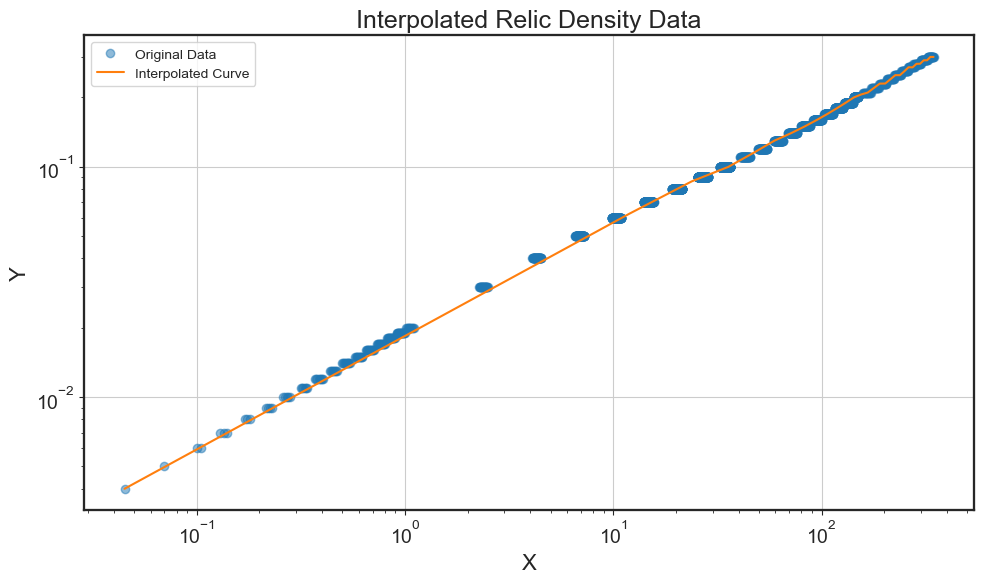

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load CSV data
RelicData = np.loadtxt('Data-Sets/RelicDensityResults.csv', delimiter=',') 

# Combine all datasets into one
RelicDensitySpace = np.vstack((RelicData))

# Sort by x value (first column)
RelicDensitySpace = RelicDensitySpace[RelicDensitySpace[:, 0].argsort()]

# Remove duplicate x values by keeping the first occurrence
_, unique_indices = np.unique(RelicDensitySpace[:, 0], return_index=True)
RelicDensitySpace = RelicDensitySpace[unique_indices]

# Interpolation
x_vals = RelicDensitySpace[:, 0]
y_vals = RelicDensitySpace[:, 1]
interp_func = interp1d(x_vals, y_vals, kind='cubic', fill_value="extrapolate")
x_interp = np.linspace(x_vals.min(), x_vals.max(), 30)
y_interp = interp_func(x_interp)

# Plot original and interpolated data


#plt.plot(RelicData)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, 'o', label='Original Data', alpha=0.5)
plt.plot(x_interp, y_interp, '-', label='Interpolated Curve')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Interpolated Relic Density Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

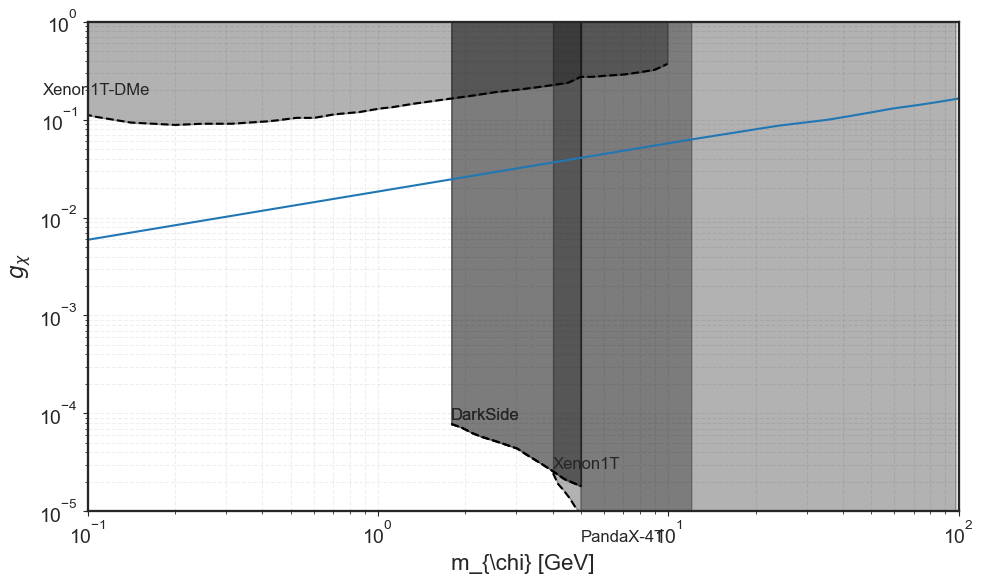

In [7]:

#plt.plot(RelicData)
plt.figure(figsize=(10, 6))

plt.plot(x_interp, y_interp, '-', label='Interpolated Curve')
plt.xscale('log')
plt.yscale('log')



plt.plot(Xenon1_x, Xenon1_y, '--', color='k')
plt.fill_between(Xenon1_x, Xenon1_y, y_max_global, color='black', alpha=0.3)
plt.text(Xenon1_x[0], Xenon1_y[0]*1.1, "Xenon1T-DMe")


plt.plot(DarkSide_x, DarkSide_y, '--', color='k')
plt.fill_between(DarkSide_x, DarkSide_y, y_max_global, color='black', alpha=0.3)
plt.text(DarkSide_x[0], DarkSide_y[0]*1.1, "DarkSide")


plt.plot(DarkSide_x, DarkSide_y, '--', color='k')
plt.fill_between(DarkSide_x, DarkSide_y, y_max_global, color='black', alpha=0.3)
plt.text(DarkSide_x[0], DarkSide_y[0]*1.1, "DarkSide")



plt.plot(PandaX_4T_x, PandaX_4T_y, '--', color='k')
plt.fill_between(PandaX_4T_x, PandaX_4T_y, y_max_global, color='black', alpha=0.3)
plt.text(PandaX_4T_x[0], PandaX_4T_y[0]*1.1, "PandaX-4T")


plt.plot(Xenon1T_x, Xenon1T_y, '--', color='k')
plt.fill_between(Xenon1T_x, Xenon1T_y, y_max_global, color='black', alpha=0.3)
plt.text(Xenon1T_x[0], Xenon1T_y[0]*1.1, "Xenon1T")

# Set plot limits last to ensure all fills are visible
plt.ylim(1e-5, y_max_global)
plt.xlim(1e-1, 1e2)

plt.xlabel("m_{\chi} [GeV]")
plt.ylabel("$g_{\chi}$")
plt.grid(True, which='both', ls='--', alpha=0.3)


plt.tight_layout()

#plt.savefig("Plots/ParameterSpaceDM.pdf")
#plt.savefig("Plots/ParameterSpaceDM.svg")
plt.show()

### Small Scales

C:\Users\Nicolás\AppData\Local\Temp\ipykernel_32684\1592174360.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


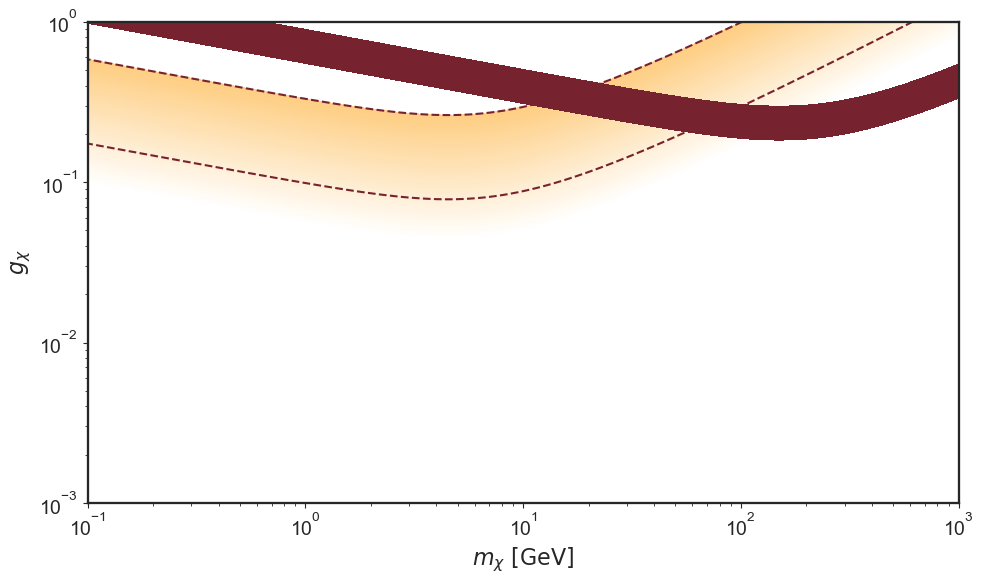

In [8]:

grid_pts = 200 #Grid Points
M = 20
g_chi = np.logspace(-3, 0, grid_pts)
m_l = np.logspace(-1, 3, grid_pts)

#Grids
g_g, m_g = np.meshgrid(g_chi, m_l)
sigma_grid_dwarf = np.zeros((grid_pts, grid_pts))
sigma_grid_clusters = np.zeros((grid_pts, grid_pts))

n = 50
levels_dw=[10, 70]
levels_cl= np.logspace(-3, 0.1, n+1)  # Generate logarithmically spaced values
fig, ax = plt.subplots(1, 1, figsize=(10, 6))


#Colors
clusterColors = BackgroundColor3
DwColors =BackgroundColor1
Muoncolors = MainColor3
RelicColors = MainColor2


patch_dw = mpatches.Patch(color=DwColors, label=r'Dwarfs')
patch_cl = mpatches.Patch(color=clusterColors, label=r'Clusters')
patch_g2 = mpatches.Patch(color=Muoncolors, label=r'$g-2$')
patch_Oh2 = mpatches.Patch(color=RelicColors, label=r'Relic Density')

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(c1)
    c2=np.array(c2)
    return (1-mix)*c1 + mix*c2

c2 = clusterColors  # yellow
c1 = (1, 1, 1)  # white
clf = [colorFader(c1, c2, (np.log10(l) + 3)/4) for l in levels_cl]



for i in range(grid_pts):
    for j in range(g_p):
        sigma_grid_dwarf[i, j] = Transfer_sigma(30, g_chi[j], M, m_l[i])
        sigma_grid_clusters[i, j] = Transfer_sigma(1000, g_chi[j], M, m_l[i])





ax.contourf(m_g, g_g, sigma_grid_clusters, levels_cl, colors=clf)
ax.contour(m_g, g_g, sigma_grid_clusters, [0.01, levels_cl[-1] ], colors=(DwColors,), linestyles='dashed')
ax.contourf(m_g, g_g, sigma_grid_dwarf, levels_dw, colors=(DwColors,))

ax.set_xlabel('$m_{\chi} ~[\mathrm{GeV} ]$' )
ax.set_ylabel('$g_{\chi} $' )
ax.set_xscale('log')
ax.set_yscale('log')
#ax[fig_index].legend(handles=[patch_dw, patch_cl, patch_g2, patch_Oh2], loc='upper left')


fig.tight_layout()
fig.show()



### Combined plots

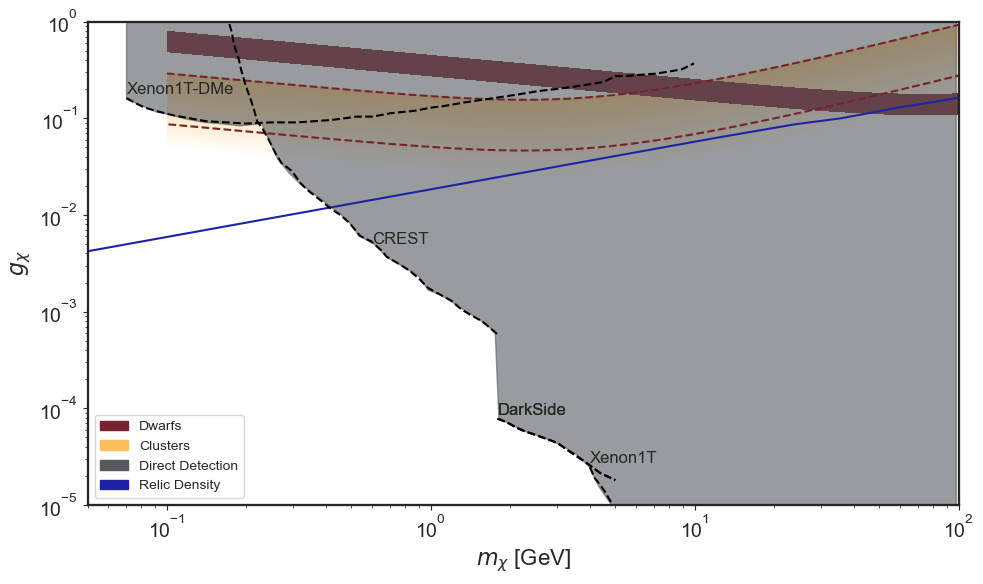

In [9]:

#Colors
clusterColors = BackgroundColor3
DwColors =BackgroundColor1
Muoncolors = MainColor3
RelicColors = MainColor2

#Plot Settings
plt.figure(figsize=(10, 6))

plt.plot(x_interp, y_interp, '-', label='Interpolated Curve', color=RelicColors)
plt.xscale('log')
plt.yscale('log')



# Settings for Astrophysics

grid_pts = 200 #Grid Points
M = 10
g_chi = np.logspace(-3, 0, grid_pts)
m_l = np.logspace(-1, 3, grid_pts)

#Grids
g_g, m_g = np.meshgrid(g_chi, m_l)
sigma_grid_dwarf = np.zeros((grid_pts, grid_pts))
sigma_grid_clusters = np.zeros((grid_pts, grid_pts))

n = 50
levels_dw=[10, 70]
levels_cl= np.logspace(-3, 0.1, n+1)  # Generate logarithmically spaced values


patch_dw = mpatches.Patch(color=DwColors, label=r'Dwarfs')
patch_cl = mpatches.Patch(color=clusterColors, label=r'Clusters')
patch_dd = mpatches.Patch(color=Gray1, label=r'Direct Detection')
patch_Oh2 = mpatches.Patch(color=RelicColors, label=r'Relic Density')

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(c1)
    c2=np.array(c2)
    return (1-mix)*c1 + mix*c2

c2 = clusterColors  # yellow
c1 = (1, 1, 1)  # white
clf = [colorFader(c1, c2, (np.log10(l) + 3)/4) for l in levels_cl]



for i in range(grid_pts):
    for j in range(g_p):
        sigma_grid_dwarf[i, j] = Transfer_sigma(30, g_chi[j], M, m_l[i])
        sigma_grid_clusters[i, j] = Transfer_sigma(1000, g_chi[j], M, m_l[i])





plt.contourf(m_g, g_g, sigma_grid_clusters, levels_cl, colors=clf)
plt.contour(m_g, g_g, sigma_grid_clusters, [0.01, levels_cl[-1] ], colors=(DwColors,), linestyles='dashed')
plt.contourf(m_g, g_g, sigma_grid_dwarf, levels_dw, colors=(DwColors,))

plt.legend(handles=[patch_dw, patch_cl, patch_dd, patch_Oh2], loc='lower left')

#Fill the constrained region by direct detectipn
plt.fill_between(DarkShadow_x, DarkShadow_y, y_max_global, color=Gray1, alpha=0.6)

# Plot for Direct Constraints
plt.plot(Xenon1_x, Xenon1_y, '--', color='k')
#plt.fill_between(Xenon1_x, Xenon1_y, y_max_global, color='black', alpha=0.3)
plt.text(Xenon1_x[0], Xenon1_y[0]*1.1, "Xenon1T-DMe")


plt.plot(DarkSide_x, DarkSide_y, '--', color='k')
#plt.fill_between(DarkSide_x, DarkSide_y, y_max_global, color='black', alpha=0.3)
plt.text(DarkSide_x[0], DarkSide_y[0]*1.1, "DarkSide")


plt.plot(DarkSide_x, DarkSide_y, '--', color='k')
#plt.fill_between(DarkSide_x, DarkSide_y, y_max_global, color='black', alpha=0.3)
plt.text(DarkSide_x[0], DarkSide_y[0]*1.1, "DarkSide")

plt.plot(CREST_x, CREST_y, '--', color='k')
#plt.fill_between(CREST_x, CREST_y, y_max_global, color='black', alpha=0.6)
plt.text(0.6, 5e-3, "CREST")



plt.plot(Xenon1T_x, Xenon1T_y, '--', color='k')
#plt.fill_between(Xenon1T_x, Xenon1T_y, y_max_global, color='black', alpha=0.3)
plt.text(Xenon1T_x[0], Xenon1T_y[0]*1.1, "Xenon1T")


plt.plot(PandaX_4T_x, PandaX_4T_y, '--', color='k')
#plt.fill_between(PandaX_4T_x, PandaX_4T_y, y_max_global, color='black', alpha=0.3)
#plt.text(PandaX_4T_x[0], PandaX_4T_y[0]*1.1, "PandaX-4T")



# Set plot limits last to ensure all fills are visible
plt.ylim(1e-5, y_max_global)
plt.xlim(5e-2, 1e2)


plt.xlabel("$m_{\chi}$ [GeV]")
plt.ylabel("$g_{\chi}$")


plt.tight_layout()

plt.savefig("Plots/ParameterSpaceDM.pdf")
plt.savefig("Plots/ParameterSpaceDM.svg")
plt.show()




NameError: name 'fc' is not defined

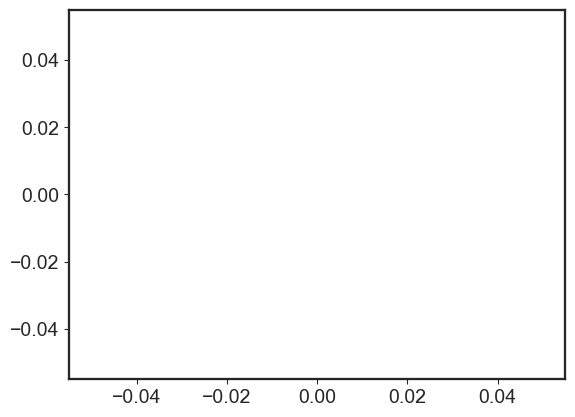

In [10]:
def aloe(mdm):
    qp = 1
    return (0.02*np.sqrt(mdm)/qp)**2/(4*np.pi)

g_p = 300 #Grid Points
M_l = np.logspace(-3, -0, g_p)
m_l = np.logspace(-1, 3, g_p)

#Grids
M_g, m_g = np.meshgrid(M_l, m_l)
sigma_grid_dwarf = np.zeros((g_p, g_p))
sigma_grid_clusters = np.zeros((g_p, g_p))


levels_dw=[1.0, 20]
levels_cl=[0.015, 0.5]

ax = plt.plot(figsize=(16, 12))
#ax = ax.ravel()

fig_index = 0

patch_dw = mpatches.Patch(color=MainColor1, label=r'$v=30$ km/s')
patch_cl = mpatches.Patch(color=BackgroundColor3, label=r'$v=1000$ km/s')

alpha=0.5


for i in range(g_p):
    for j in range(g_p):
        sigma_grid_dwarf[i, j] = sigmaV(aloe(m_l[i]), m_l[i], M_l[j],10*np.sqrt(np.pi)/4)
        sigma_grid_clusters[i, j] = sigmaV(aloe(m_l[i]), m_l[i], M_l[j],1000*np.sqrt(np.pi)/4)
        



#plt.fill_between(m_l, M_l[0], 1e-2, color=Gray1, alpha=0.3) 
plt.contourf(m_g, M_g, sigma_grid_clusters, levels_cl, colors=(BackgroundColor3,),alpha=0.9)
plt.contourf(m_g, M_g, sigma_grid_dwarf, levels_dw, colors=(MainColor1,) ,alpha=0.9)


plt.xlabel('$m_{\chi} (\mathrm{GeV} )$' )
plt.ylabel('$m_{Z\'} (\mathrm{GeV} )$' )
plt.xscale('log')
plt.yscale('log')
plt.legend(handles=[patch_dw, patch_cl], loc='upper left')

fig_index +=1

In [ ]:
from CrossSections import Transfer_sigma
from cross_sections import sigmaV

Transfer_sigma(1, 0.01, 19, 10)

1.3398393795568038e-05

In [ ]:
sigmaV(0.01, 10, 20, 100)

NameError: name 'c' is not defined